<a href="https://colab.research.google.com/github/Abre1234/Transport-and-logistics/blob/main/Copy_of_Tr2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Neural Network Project: Predicting Cost per Km

## Import Required Libraries


# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Neural Network (TensorFlow / Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load the dataset
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Transport and logistics dataset/Original/trans_dataset2.xlsx')

# Display the first 5 rows
display(df.head())

,የመኪና_አይነት,የመኪና_ደረጃ,የመንገድ_አይነት,ቀን,የናፍጣ_ዋጋ,የቤንዚን_ዋጋ,የቀደመው_ነባር_ታሪፍ_ኪሜ,አዲስ_ታሪፍ_ኪሜ
0,አነስተኛ,ደረጃ_1,አስፓልት,30/08/2017,107.93,112.67,2.1508,2.3010
1,አነስተኛ,ደረጃ_1,ጠጠር,30/08/2017,107.93,112.67,2.2928,2.4244
2,አነስተኛ,ደረጃ_1,ዩራፕ,30/08/2017,107.93,112.67,2.3509,2.6675
3,አነስተኛ,ደረጃ_2,አስፓልት,30/08/2017,107.93,112.67,2.1245,2.2445
4,አነስተኛ,ደረጃ_2,ጠጠር,30/08/2017,107.93,112.67,2.2328,2.3810


## Display descriptive statistics

### Subtask:
Show the summary statistics of the numerical columns.


**Reasoning**:
Generate descriptive statistics for all numerical columns in the dataframe.



In [3]:
display(df.describe())

,የናፍጣ_ዋጋ,የቤንዚን_ዋጋ,የቀደመው_ነባር_ታሪፍ_ኪሜ,አዲስ_ታሪፍ_ኪሜ
count,162.000000,162.000000,162.000000,162.000000
mean,81.183333,81.516667,1.492507,1.643973
std,16.530899,18.405517,0.490327,0.466954
min,46.490000,47.830000,0.521600,0.805700
25%,79.760000,77.650000,1.030875,1.244700
50%,81.910000,80.050000,1.502850,1.695300
75%,83.740000,91.140000,1.876275,2.000050
max,107.930000,112.670000,2.465900,2.667500


## Check for missing values

### Subtask:
Identify any missing values in the dataset.


**Reasoning**:
Count the number of missing values in each column of the DataFrame.



In [4]:
missing_values = df.isnull().sum()
display(missing_values)

,0
የመኪና_አይነት,0
የመኪና_ደረጃ,0
የመንገድ_አይነት,0
ቀን,0
የናፍጣ_ዋጋ,0
የቤንዚን_ዋጋ,0
የቀደመው_ነባር_ታሪፍ_ኪሜ,0
አዲስ_ታሪፍ_ኪሜ,0


## Check for duplicates

### Subtask:
Identify any duplicate rows in the dataset.


**Reasoning**:
Check for duplicate rows in the DataFrame and display the count.



In [6]:
duplicate_rows_count = df.duplicated().sum()
display(f"Total number of duplicate rows: {duplicate_rows_count}")

'Total number of duplicate rows: 0'


##EDA
## Visualize data distributions

### Subtask:
Create visualizations (e.g., histograms, box plots) to understand the distribution of key features.

In [7]:
import matplotlib.font_manager as fm
import requests
import os

# URL of the font file
font_url = "https://github.com/Abre1234/Transport-and-logistics/raw/main/NotoSansEthiopic-Regular.ttf"
# Local path to save the font file
font_path = "NotoSansEthiopic-Regular.ttf"

# Download the font file
try:
    response = requests.get(font_url)
    response.raise_for_status() # Raise an exception for bad status codes
    with open(font_path, 'wb') as f:
        f.write(response.content)
    print(f"Font downloaded successfully to {font_path}")
except requests.exceptions.RequestException as e:
    print(f"Error downloading font: {e}")
    font_path = None # Set font_path to None if download fails

# Load the font if download was successful
if font_path and os.path.exists(font_path):
    try:
        ethiopic_font = fm.FontProperties(fname=font_path)
        # Add the font to matplotlib's font cache
        fm.fontManager.addfont(font_path)
        # Set globally
        plt.rcParams['font.family'] = ethiopic_font.get_name()
        print(f"Font '{ethiopic_font.get_name()}' loaded and set globally.")
    except Exception as e:
        print(f"Error loading font: {e}")
else:
    print("Font file not found locally after download attempt.")

Font downloaded successfully to NotoSansEthiopic-Regular.ttf
Font 'Noto Sans Ethiopic' loaded and set globally.


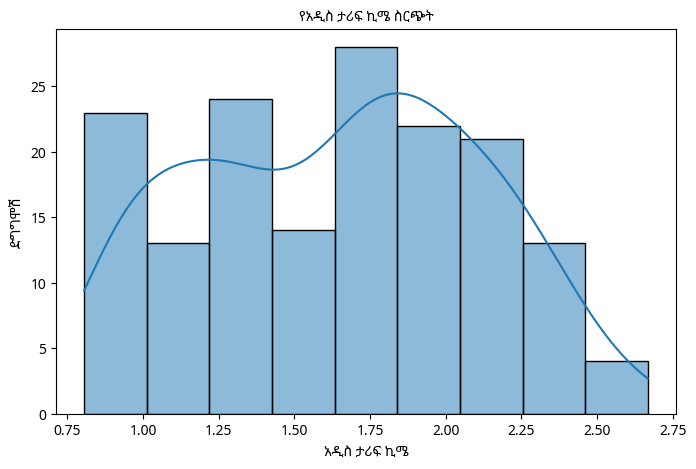

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df["አዲስ_ታሪፍ_ኪሜ"], kde=True)
plt.title("የአዲስ ታሪፍ ኪሜ ስርጭት", fontproperties=ethiopic_font)
plt.xlabel("አዲስ ታሪፍ ኪሜ", fontproperties=ethiopic_font)
plt.ylabel("ድግግሞሽ", fontproperties=ethiopic_font)
plt.xticks(fontproperties=ethiopic_font)
plt.yticks(fontproperties=ethiopic_font)
plt.show()

/tmp/ipython-input-2119803901.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=road_type_avg, x="የመንገድ_አይነት", y="አዲስ_ታሪፍ_ኪሜ", palette="Set3")


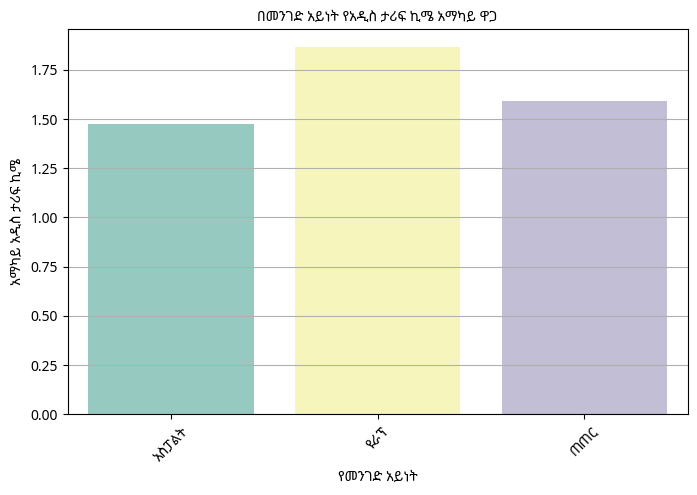

In [9]:
road_type_avg = df.groupby("የመንገድ_አይነት")["አዲስ_ታሪፍ_ኪሜ"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=road_type_avg, x="የመንገድ_አይነት", y="አዲስ_ታሪፍ_ኪሜ", palette="Set3")
plt.title("በመንገድ አይነት የአዲስ ታሪፍ ኪሜ አማካይ ዋጋ", fontproperties=ethiopic_font)
plt.xlabel("የመንገድ አይነት", fontproperties=ethiopic_font)
plt.ylabel("አማካይ አዲስ ታሪፍ ኪሜ", fontproperties=ethiopic_font)
plt.xticks(rotation=45, fontproperties=ethiopic_font)
plt.yticks(fontproperties=ethiopic_font)
plt.grid(axis="y")
plt.show()

/tmp/ipython-input-1484918578.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x="GroupLabel", y="አዲስ_ታሪፍ_ኪሜ", palette="viridis")


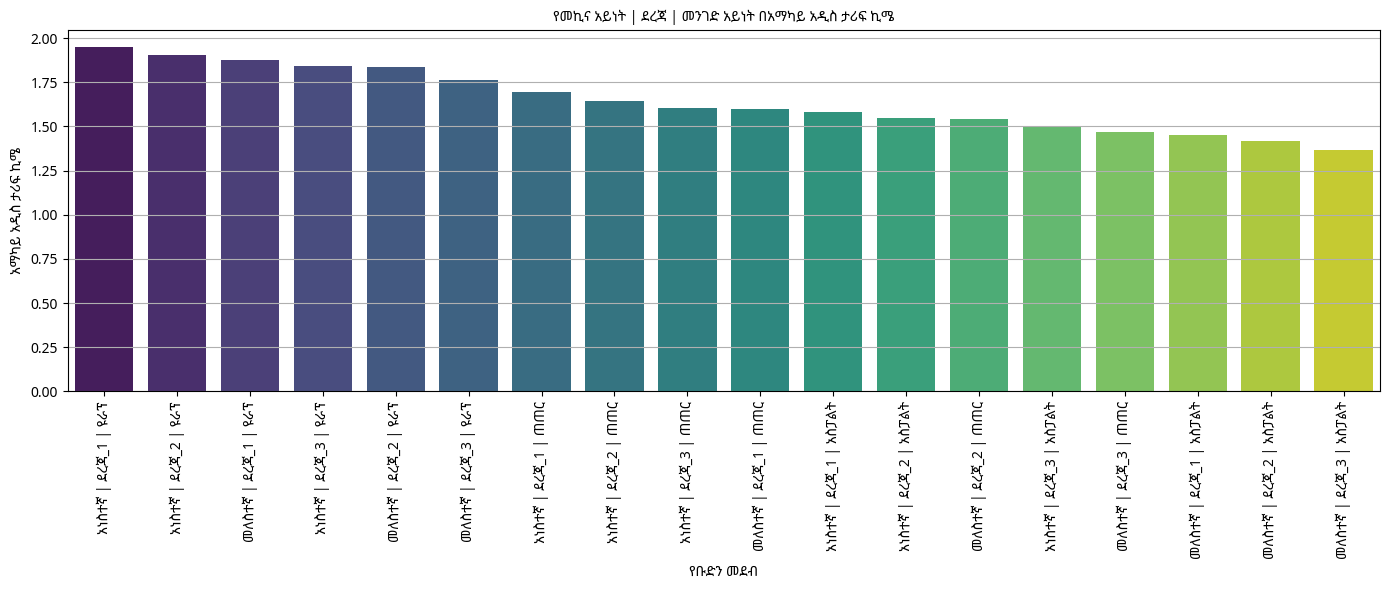

In [10]:



# Group by the 3 categorical variables and calculate average cost per km
grouped = df.groupby(["የመኪና_አይነት", "የመኪና_ደረጃ", "የመንገድ_አይነት"])["አዲስ_ታሪፍ_ኪሜ"].mean().reset_index()

# Create a combined label to use on x-axis
grouped["GroupLabel"] = grouped["የመኪና_አይነት"] + " | " + grouped["የመኪና_ደረጃ"] + " | " + grouped["የመንገድ_አይነት"]

# Sort by average cost to make it readable
grouped = grouped.sort_values(by="አዲስ_ታሪፍ_ኪሜ", ascending=False)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=grouped, x="GroupLabel", y="አዲስ_ታሪፍ_ኪሜ", palette="viridis")

plt.title("የመኪና አይነት | ደረጃ | መንገድ አይነት በአማካይ አዲስ ታሪፍ ኪሜ", fontproperties=ethiopic_font)
plt.xlabel("የቡድን መደብ", fontproperties=ethiopic_font)
plt.ylabel("አማካይ አዲስ ታሪፍ ኪሜ", fontproperties=ethiopic_font)

plt.xticks(rotation=90, fontproperties=ethiopic_font)
plt.yticks(fontproperties=ethiopic_font)
plt.tight_layout()
plt.grid(axis="y")
plt.show()

In [11]:
# Ensure 'ቀን' is datetime
df['ቀን'] = pd.to_datetime(df['ቀን'], errors='coerce', dayfirst=True)

# Sort the dataframe by date
df = df.sort_values(by='ቀን')

# Extract year and month
df['ዓመት'] = df['ቀን'].dt.year
df['ወር'] = df['ቀን'].dt.month

# Display to confirm
display(df[['ቀን', 'ዓመት', 'ወር']].head())

,ቀን,ዓመት,ወር
69,2014-10-30,2014,10
71,2014-10-30,2014,10
70,2014-10-30,2014,10
54,2014-10-30,2014,10
55,2014-10-30,2014,10


In [12]:
# Create combined Year-Month for better time series visuals and potential features
df['ዓመት_ወር'] = df['ቀን'].dt.to_period('M').astype(str)

# Ensure the time series is sorted by date
df = df.sort_values(by='ቀን')

# Display the updated dataframe with the new column and sorted dates
display(df[['ቀን', 'ዓመት_ወር']].head())

,ቀን,ዓመት_ወር
69,2014-10-30,2014-10
60,2014-10-30,2014-10
67,2014-10-30,2014-10
66,2014-10-30,2014-10
65,2014-10-30,2014-10


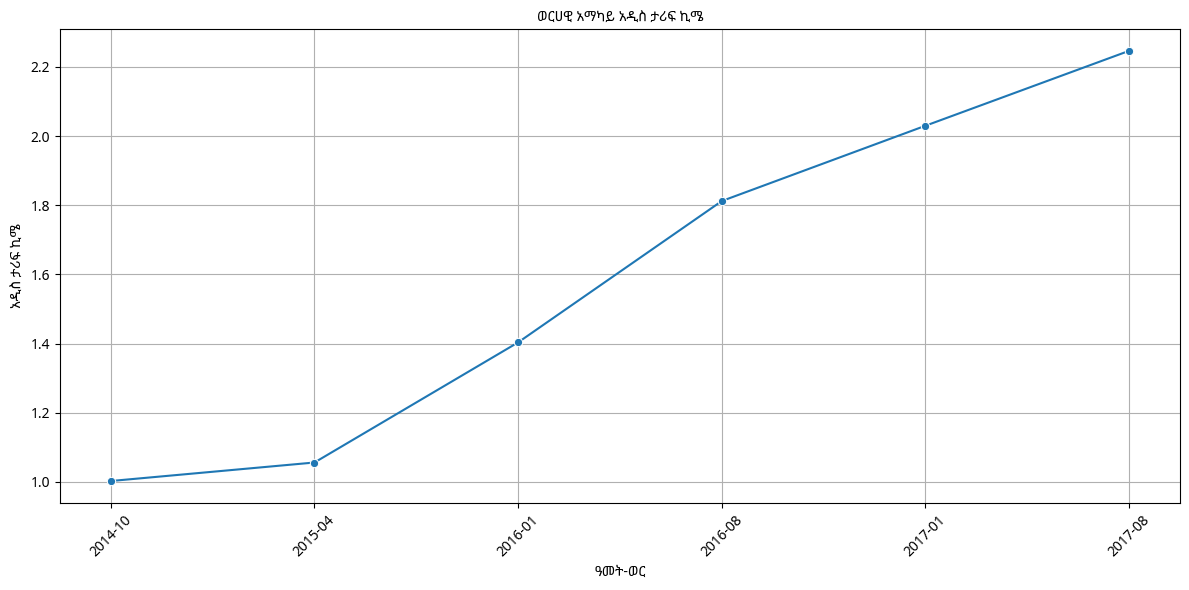

In [13]:

# Group and average by year-month
monthly_avg = df.groupby('ዓመት_ወር')['አዲስ_ታሪፍ_ኪሜ'].mean().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_avg, x='ዓመት_ወር', y='አዲስ_ታሪፍ_ኪሜ', marker='o')
plt.title("ወርሀዊ አማካይ አዲስ ታሪፍ ኪሜ", fontproperties=ethiopic_font)
plt.xlabel("ዓመት-ወር", fontproperties=ethiopic_font)
plt.ylabel("አዲስ ታሪፍ ኪሜ", fontproperties=ethiopic_font)
plt.xticks(rotation=45, fontproperties=ethiopic_font)
plt.yticks(fontproperties=ethiopic_font)
plt.tight_layout()
plt.grid()
plt.show()

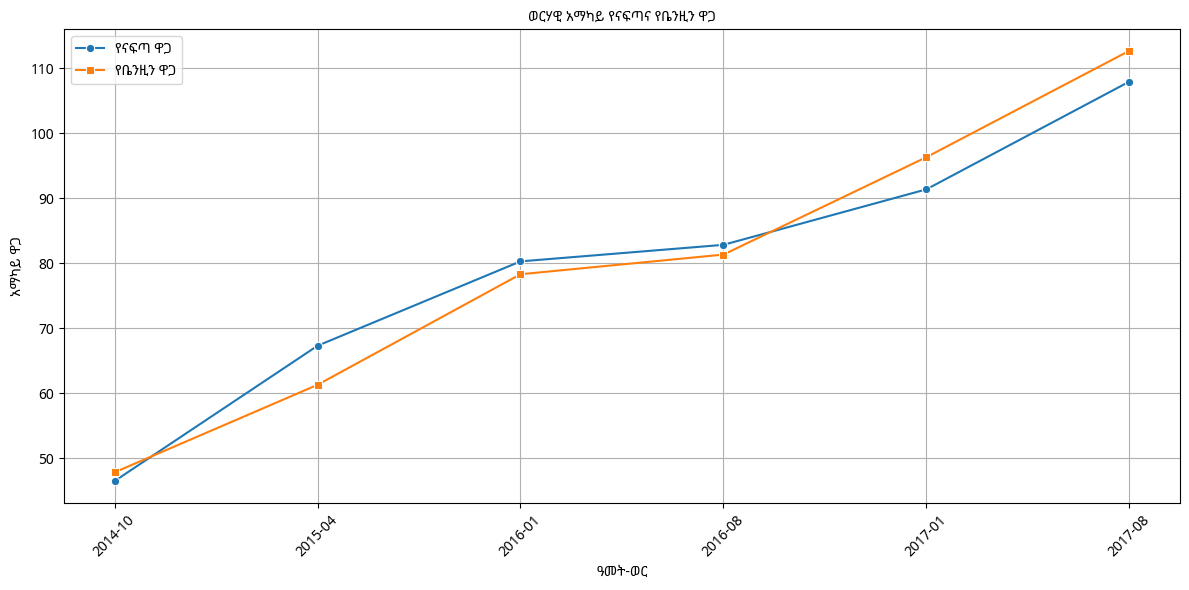

In [14]:
# Group by year-month and calculate average for each fuel price
monthly_fuel = df.groupby('ዓመት_ወር')[['የናፍጣ_ዋጋ', 'የቤንዚን_ዋጋ']].mean().reset_index()

# Plot both fuel prices on the same line chart
plt.figure(figsize=(12, 6))

sns.lineplot(data=monthly_fuel, x='ዓመት_ወር', y='የናፍጣ_ዋጋ', label='የናፍጣ ዋጋ', marker='o')
sns.lineplot(data=monthly_fuel, x='ዓመት_ወር', y='የቤንዚን_ዋጋ', label='የቤንዚን ዋጋ', marker='s')

# Titles and labels
plt.title("ወርሃዊ አማካይ የናፍጣና የቤንዚን ዋጋ", fontproperties=ethiopic_font)
plt.xlabel("ዓመት-ወር", fontproperties=ethiopic_font)
plt.ylabel("አማካይ ዋጋ", fontproperties=ethiopic_font)
plt.xticks(rotation=45, fontproperties=ethiopic_font)
plt.yticks(fontproperties=ethiopic_font)
plt.legend(prop=ethiopic_font)
plt.tight_layout()
plt.grid()
plt.show()

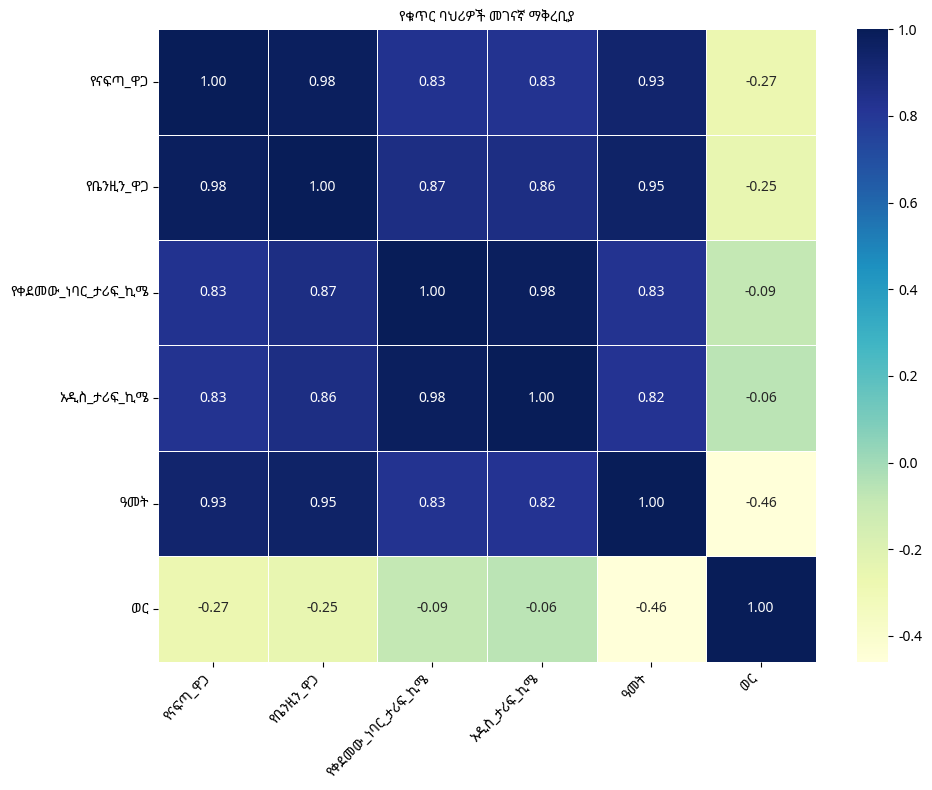

In [15]:
# Select only numerical columns for correlation
numeric_cols = df.select_dtypes(include=np.number)

# Compute correlation matrix
corr = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5,
            annot_kws={"fontproperties": ethiopic_font},
            xticklabels=[label for label in numeric_cols.columns],
            yticklabels=[label for label in numeric_cols.columns])

plt.title("የቁጥር ባህሪዎች መገናኛ ማቅረቢያ", fontproperties=ethiopic_font)
plt.xticks(rotation=45, fontproperties=ethiopic_font, ha='right')
plt.yticks(rotation=0, fontproperties=ethiopic_font)
plt.tight_layout()
plt.show()

## Feature Scaling and Data Splitting

Scale the numerical features and split the data into training and testing sets.

In [17]:
# Drop the original date columns before encoding
df_processed = df.drop(columns=['ቀን', 'ዓመት', 'ወር', 'ዓመት_ወር'])

# Identify categorical and numerical columns in the processed dataframe
categorical_cols_processed = df_processed.select_dtypes(include='object').columns
numerical_cols_processed = df_processed.select_dtypes(include=np.number).columns

# The target variable 'አዲስ_ታሪፍ_ኪሜ' is numerical and should not be scaled with features
numerical_features = numerical_cols_processed.drop(['አዲስ_ታሪፍ_ኪሜ'])

# Apply Label Encoding to categorical columns
label_encoders = {}
for col in categorical_cols_processed:
    label_encoders[col] = LabelEncoder()
    df_processed[col] = label_encoders[col].fit_transform(df_processed[col])

# Scale numerical features
scaler = StandardScaler()
df_processed[numerical_features] = scaler.fit_transform(df_processed[numerical_features])

# Define features (X) and target (y)
# Exclude the target variable from features
X = df_processed.drop(columns=['አዲስ_ታሪፍ_ኪሜ'])
y = df_processed['አዲስ_ታሪፍ_ኪሜ']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (129, 6)
Shape of X_test: (33, 6)
Shape of y_train: (129,)
Shape of y_test: (33,)


## Build and Train the Neural Network Model

Define and train a sequential neural network model.

In [54]:
# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'), # Added another dense layer
    Dropout(0.2),
    Dense(1) # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Define Early Stopping callback
# Monitor validation loss and stop if it doesn't improve for 'patience' epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model wqith Early Stopping
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

Epoch 1/1000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 677ms/step - loss: 4.4674 - mae: 2.0671 - val_loss: 3.7658 - val_mae: 1.8972
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 3.7594 - mae: 1.8921 - val_loss: 3.4612 - val_mae: 1.8141
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.5611 - mae: 1.8387 - val_loss: 3.3061 - val_mae: 1.7700
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 3.2976 - mae: 1.7629 - val_loss: 3.1821 - val_mae: 1.7346
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 3.0425 - mae: 1.6879 - val_loss: 3.0696 - val_mae: 1.7019
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 2.8004 - mae: 1.6084 - val_loss: 2.9480 - val_mae: 1.6656
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 2.5737 - mae: 1.5465 - val_loss: 2.8182 - val_mae: 1.6256
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 2.4724 - mae: 1.5039 - val_loss: 2.6710 - val_mae: 1.5779
Epoch 9/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 2.4235 - mae: 1.4

## Evaluate the Model

Evaluate the trained model on the test set.

In [55]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss (MSE): {loss:.4f}")
print(f"Test MAE: {mae:.4f}")

# Make predictions
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"Test R-squared: {r2:.4f}")

Test Loss (MSE): 0.0214
Test MAE: 0.1156
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
Test R-squared: 0.8718


## Check for Overfitting

Visualize the training and validation loss and MAE over epochs to check for overfitting.

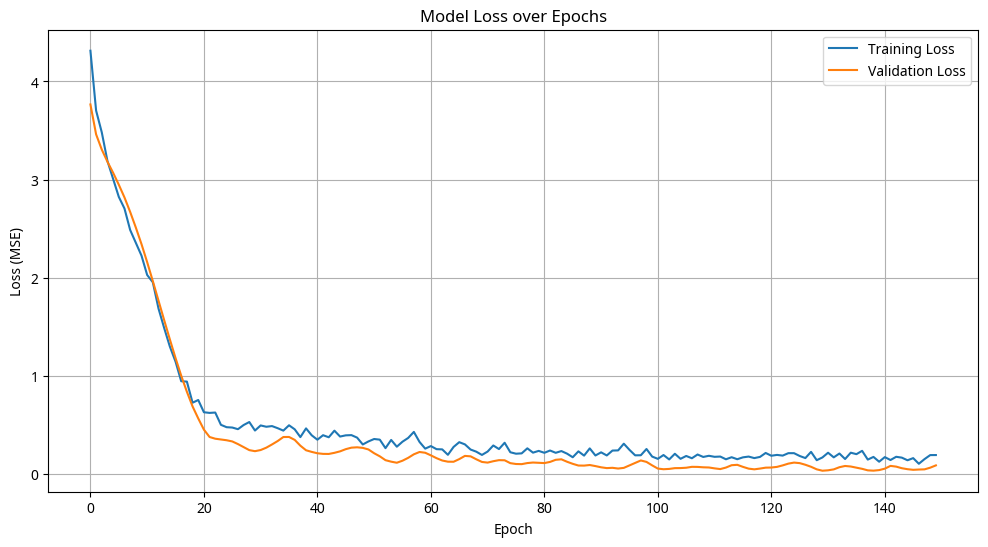

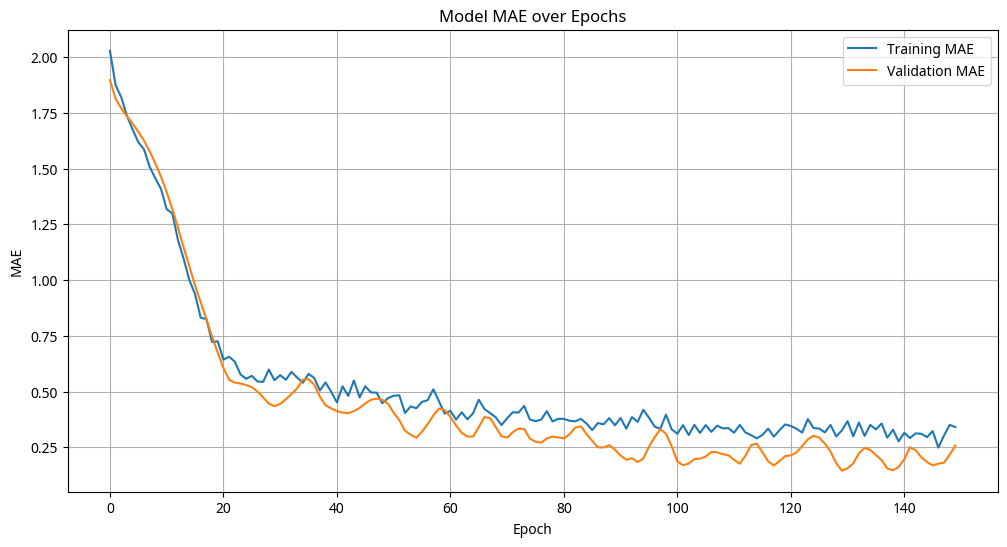

In [79]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation MAE
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE over Epochs')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)
plt.show()

##Train Other model

In [57]:

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


# Instantiate models

rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

# Train models

rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

print("Models trained successfully.")

Models trained successfully.


#Evaluate other models

In [76]:
# Evaluate each model on the test set
model_performance = {}

# Neural Network (already trained and evaluated)
# Get the metrics from the previous evaluation step
nn_loss, nn_mae = model.evaluate(X_test, y_test, verbose=0)
y_pred_nn = model.predict(X_test)
nn_r2 = r2_score(y_test, y_pred_nn)

model_performance['Neural Network'] = {
    'MSE': nn_loss,
    'MAE': nn_mae,
    'R-squared': nn_r2
}


# Evaluate Random Forest Regressor
y_pred_rf = rf_model.predict(X_test)
model_performance['Random Forest'] = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'R-squared': r2_score(y_test, y_pred_rf)
}

# Evaluate Gradient Boosting Regressor
y_pred_gb = gb_model.predict(X_test)
model_performance['Gradient Boosting'] = {
    'MSE': mean_squared_error(y_test, y_pred_gb),
    'MAE': mean_absolute_error(y_test, y_pred_gb),
    'R-squared': r2_score(y_test, y_pred_gb)
}



# Print the performance metrics for each model
print("Model Performance Metrics:")
for model_name, metrics in model_performance.items():
    print(f"\n{model_name}:")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  MAE: {metrics['MAE']:.4f}")
    print(f"  R-squared: {metrics['R-squared']:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Model Performance Metrics:

Neural Network:
  MSE: 0.0214
  MAE: 0.1156
  R-squared: 0.8718

Random Forest:
  MSE: 0.0028
  MAE: 0.0452
  R-squared: 0.9835

Gradient Boosting:
  MSE: 0.0020
  MAE: 0.0352
  R-squared: 0.9879


In [77]:
# Create a DataFrame from the model_performance dictionary
performance_df = pd.DataFrame.from_dict(model_performance, orient='index')

# Display the DataFrame
display(performance_df)

,MSE,MAE,R-squared
Neural Network,0.021434,0.115570,0.871757
Random Forest,0.002763,0.045156,0.983471
Gradient Boosting,0.002018,0.035209,0.987926


**Reasoning**:
Create bar plots to visualize the MSE, MAE, and R-squared values for each model to visually compare their performance.



/tmp/ipython-input-3630222008.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_df.index, y=performance_df['MSE'], palette='viridis')


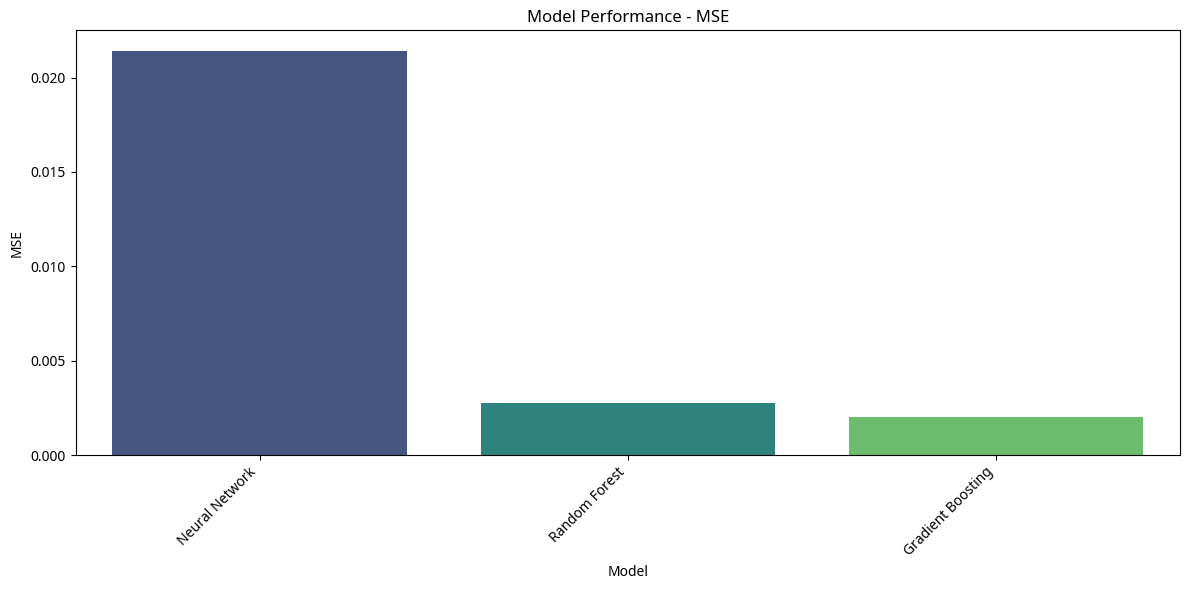

/tmp/ipython-input-3630222008.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_df.index, y=performance_df['MAE'], palette='viridis')


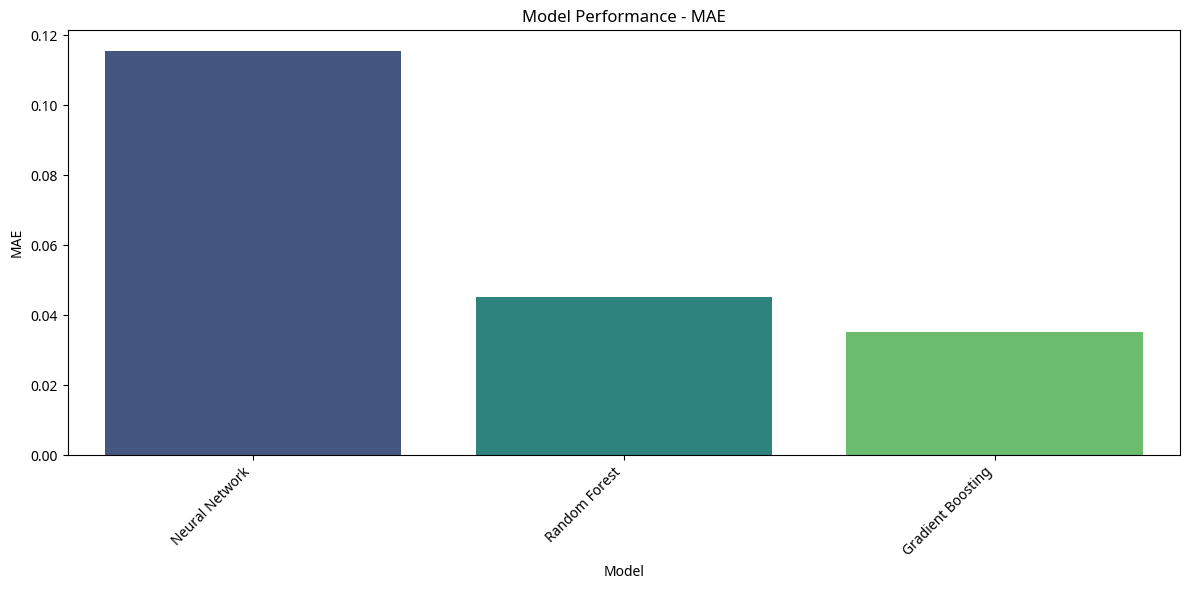

/tmp/ipython-input-3630222008.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=performance_df.index, y=performance_df['R-squared'], palette='viridis')


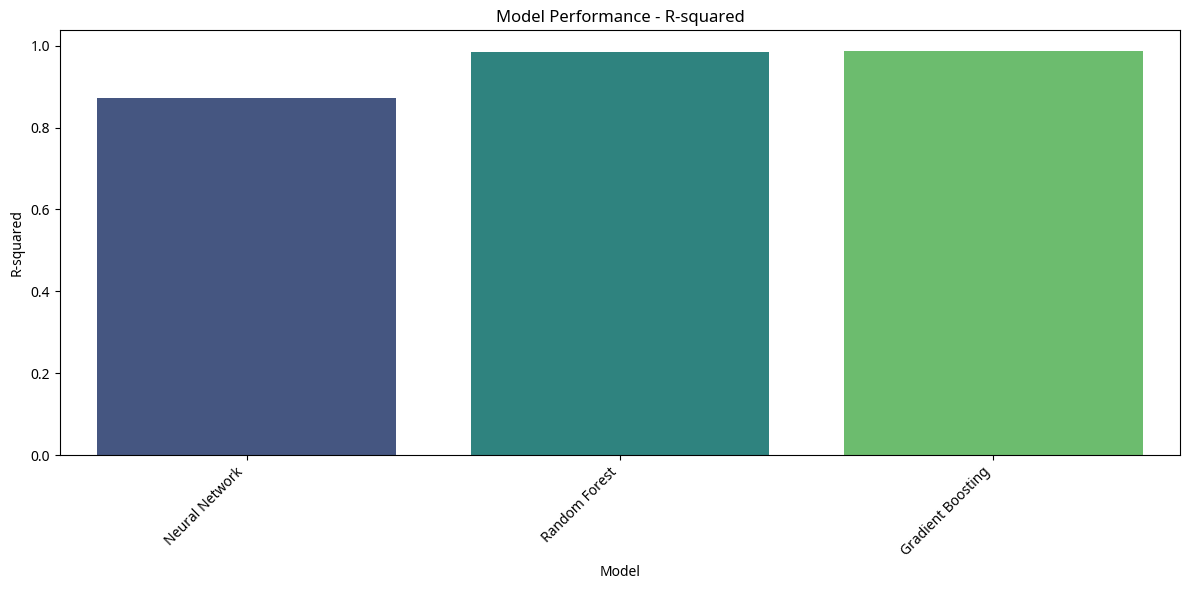

In [78]:
# Plot MSE
plt.figure(figsize=(12, 6))
sns.barplot(x=performance_df.index, y=performance_df['MSE'], palette='viridis')
plt.title('Model Performance - MSE')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot MAE
plt.figure(figsize=(12, 6))
sns.barplot(x=performance_df.index, y=performance_df['MAE'], palette='viridis')
plt.title('Model Performance - MAE')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot R-squared
plt.figure(figsize=(12, 6))
sns.barplot(x=performance_df.index, y=performance_df['R-squared'], palette='viridis')
plt.title('Model Performance - R-squared')
plt.xlabel('Model')
plt.ylabel('R-squared')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Create a prediction function for the Scaled DNN Model

Define a function that takes raw input features, preprocesses them using the previously fitted `LabelEncoder` and `StandardScaler`, and then uses the trained **scaled** neural network model (`model`) to make a prediction.

In [72]:
def predict_cost_dnn_scaled(የመኪና_አይነት, የመኪና_ደረጃ, የመንገድ_አይነት, የናፍጣ_ዋጋ, የቤንዚን_ዋጋ, የቀደመው_ነባር_ታሪፍ_ኪሜ):
    """
    Predicts the new cost per km using the scaled DNN model.

    Args:
        የመኪና_አይነት (str): Type of vehicle.
        የመኪና_ደረጃ (str): Level of vehicle.
        የመንገድ_አይነት (str): Type of road.
        የናፍጣ_ዋጋ (float): Diesel price.
        የቤንዚን_ዋጋ (float): Benzene price.
        የቀደመው_ነባር_ታሪፍ_ኪሜ (float): Previous cost per km.

    Returns:
        float: Predicted new cost per km.
    """
    # Create a DataFrame from the input values
    input_df = pd.DataFrame([[የመኪና_አይነት, የመኪና_ደረጃ, የመንገድ_አይነት, የናፍጣ_ዋጋ, የቤንዚን_ዋጋ, የቀደመው_ነባር_ታሪፍ_ኪሜ]],
                            columns=['የመኪና_አይነት', 'የመኪና_ደረጃ', 'የመንገድ_አይነት', 'የናፍጣ_ዋጋ', 'የቤንዚን_ዋጋ', 'የቀደመው_ነባር_ታሪፍ_ኪሜ'])

    # Apply Label Encoding to categorical columns using the original label_encoders
    for col in ['የመኪና_አይነት', 'የመኪና_ደረጃ', 'የመንገድ_አይነት']:
        if input_df[col][0] in label_encoders[col].classes_:
            input_df[col] = label_encoders[col].transform(input_df[col])
        else:
             # Handle unseen categories - a robust approach would be needed for production
             print(f"Warning: Unseen category '{input_df[col][0]}' in column '{col}'. Using placeholder.")
             input_df[col] = -1 # Or some other appropriate handling for unseen data


    # Select numerical features for scaling
    numerical_features_input = input_df[['የናፍጣ_ዋጋ', 'የቤንዚን_ዋጋ', 'የቀደመው_ነባር_ታሪፍ_ኪሜ']]

    # Apply StandardScaler to numerical features using the original scaler
    scaled_numerical_features = scaler.transform(numerical_features_input)

    # Create a DataFrame with scaled numerical features and encoded categorical features
    # Ensure the column order matches X_train (the scaled training data)
    processed_input = pd.DataFrame(scaled_numerical_features, columns=numerical_features_input.columns)
    processed_input['የመኪና_አይነት'] = input_df['የመኪና_አይነት']
    processed_input['የመኪና_ደረጃ'] = input_df['የመኪና_ደረጃ']
    processed_input['የመንገድ_አይነት'] = input_df['የመንገድ_አይነት']

    # Reorder columns to match X_train
    processed_input = processed_input[X_train.columns]


    # Make prediction using the trained scaled DNN model ('model')
    prediction = model.predict(processed_input)

    return prediction[0][0]

## Create the Gradio Interface for Scaled DNN Model

Build a Gradio interface with input components corresponding to the features and an output component to display the predicted cost per km using the scaled DNN model.

In [73]:
import gradio as gr

# Define Gradio input components using the classes from the original label encoders
inputs_dnn_scaled = [
    gr.Dropdown(label="የመኪና አይነት", choices=label_encoders['የመኪና_አይነት'].classes_.tolist()),
    gr.Dropdown(label="የመኪና ደረጃ", choices=label_encoders['የመኪና_ደረጃ'].classes_.tolist()),
    gr.Dropdown(label="የመንገድ አይነት", choices=label_encoders['የመንገድ_አይነት'].classes_.tolist()),
    gr.Number(label="የናፍጣ ዋጋ"),
    gr.Number(label="የቤንዚን ዋጋ"),
    gr.Number(label="የቀደመው ነባር ታሪፍ ኪሜ")
]

# Define Gradio output component
output_dnn_scaled = gr.Number(label="የተተነበየ አዲስ ታሪፍ ኪሜ (Scaled DNN)")

# Create the Gradio interface
iface_dnn_scaled = gr.Interface(
    fn=predict_cost_dnn_scaled,
    inputs=inputs_dnn_scaled,
    outputs=output_dnn_scaled,
    title="የመኪና ዋጋ ትንበያ ሞዴል (Scaled DNN)"
)

# Launch the interface (this is typically done in a separate cell or script)
# iface_dnn_scaled.launch()

## Launch the Gradio app for Scaled DNN Model

Run the Gradio app for the scaled DNN model to make it accessible for interaction.

In [74]:
iface_dnn_scaled.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://cf345f4cf43884011a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
